# What is the True Normal Human Body Temperature?

Background

The mean normal body temperature was held to be 37∘C or 98.6∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# Exercises

In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions in this notebook below and submit to your Github account.

Is the distribution of body temperatures normal?

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

Is the true population mean really 98.6 degrees F?

Would you use a one-sample or two-sample test? Why?

In this situation, is it appropriate to use the t or z statistic?

Now try using the other test. How is the result be different? Why?

Draw a small sample of size 10 from the data and repeat both tests.

Which one is the correct one to use?

What do you notice? What does this tell you about the difference in application of the `t

At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

Is there a significant difference between males and females in normal temperature?

What test did you use and why?

Write a story with your conclusion in the context of the original problem.

In [3]:
from IPython.display import HTML
HTML('<iframe src=http://stanford.edu/~mwaskom/software/seaborn/index.html width=700 height=350></iframe>')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [4]:
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [5]:
file= '/home/kiran/Desktop/Springboard/human_temp/data/human_body_temperature.csv'

In [6]:
df=pd.read_csv(file)

In [7]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


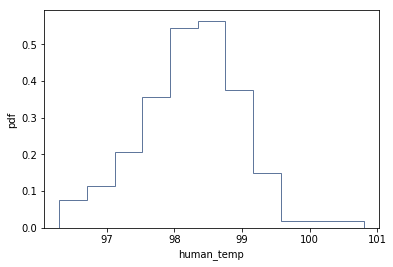

In [66]:
# Plotting histogram to check the distribution
human_temp=df['temperature'].values # extracted all the temperature values as numpy array
n_data = len(human_temp)
n_bins = np.sqrt(n_data)  # calculating number of bins
n_bins = int(n_bins)
n_bins = int(n_bins)
_=plt.hist(human_temp,bins=n_bins,normed= True,histtype = 'step')
plt.xlabel('human_temp')
plt.ylabel('pdf')
plt.show()

#Below graph looks like Normal Distribution

In [9]:
# Summary staistics for the temperature column
mu= np.mean(human_temp)
print(mu)
sigma=np.std(human_temp)
print(sigma)


98.2492307692
0.730357778905


In [10]:
# Writing function to calculate ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
   
       
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x

    x= np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

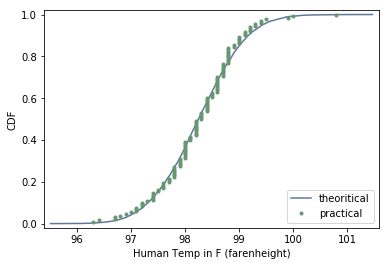

In [11]:
## Using ECDF plot to dtermine Normal Distrubution

# Compute mean and standard deviation: mu, sigma
mu = np.mean(human_temp)
sigma = np.std(human_temp)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,10000)

# Get the CDF of the samples and of the data
x_theor,y_theor =ecdf(samples)
x,y = ecdf(human_temp)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Human Temp in F (farenheight)')
_ = plt.ylabel('CDF')
_=plt.legend(('theoritical','practical'),loc ='lower right')
plt.show()

## From the figure below it looks like distrubiton is normal since it closely resembles the theoritical normal distribution

In [12]:
#Size of the dataset
len(human_temp)

# Since the sample size is greater than 50 the sample size is large and since the distribution follows normal distribution 
# so the assumption is values are independent of each ther


130

# Is the true population mean really 98.6 degrees F?
 For this I will use one sample test since here I am comparing one set of data to a single number mean 98.6 F
 Also since the sample size is large i.e  >30 I will use z staistic


Our Null Hypothesis H0: Average Human Temperature = 98.6 
Alternate Hypothesis H1: Avergae human temerature is <98.6

In [13]:
# Summary staistics for the temperature column
mu= np.mean(human_temp)
print(mu)
sigma=np.std(human_temp)
print(sigma)

98.2492307692
0.730357778905


I will use one sample test here since I have to compare sample mean to a given number whichin this case is equal to population mean of 98.6

Since the sample size is greater than 50 it will be appropriate to use Z-statistic but using T-staistic should also give the same results since t-distrubtion tends to follow normal distrubtion for large sample size 

In [42]:
#Z-Staistic
population_mean=98.6
Z_value = (mu-population_mean)/(sigma/np.sqrt(len(human_temp)))
print('The Z Statistic is: %s' % Z_value)
p_value =stats.norm.cdf(Z_value)
print('And the pvalue is: %s' % p_value)

The Z Statistic is: -5.47592520208
And the pvalue is: 2.17615758294e-08


Now performing t-test on the above sample human_temp

In [51]:
#T-test
t_statistic,pvalue=stats.ttest_1samp(human_temp,population_mean)
print('The value of t_statistic is: %s' %t_statistic)
print('The pvalue is: %s' %pvalue)

The value of t_statistic is: -5.45482329236
The pvalue is: 2.41063204156e-07


It can be seen from above that vlaues from t-test are similar to Z test so it proves the point t-distrubtion tends to follow normal distrubtion for large sample size 

Since the p-value is very small this states that we can reject the null hypothesis that avergae human temp is equal to true population mean 98.6 

In [53]:
#Extract the sample size of 10
human_temp_10=np.random.choice(human_temp,size=10)
human_temp_10

array([  98.2,   96.3,   98.2,   96.9,   99.9,   99. ,   99.3,   97.2,
        100. ,   96.4])

In [56]:
#Summary Statistics
mu_10=np.mean(human_temp_10)
print(mu_10)
sigma_10=np.std(human_temp_10)
print(sigma_10)

98.14
1.32227077409


Now Since the sample size is small that is less than 30 it makes sense to use t-test/statistic since normal distrubtion tends to be inaccurate for small sample size 

Using One sample t-test 

In [55]:
T_statistic,P_value = stats.ttest_1samp(human_temp_10,population_mean) #population_mean=98.6
print('The value of Tstaistic : %s' %T_statistic)
print('THe pvalue is: %s' %P_value)

The value of Tstaistic : -1.04365915594
THe pvalue is: 0.323864436311


Performing Z-test to comapre the results

In [59]:
Z10_value=(mu_10-population_mean)/(sigma_10/np.sqrt(len(human_temp_10)))
print('The z-Statistic will be: %s'%T_value)
p_10=stats.norm.cdf(Z10_value)
print('The pvalue will be: %s'%p_10)

The z-Statistic will be: -1.6879460925
The pvalue will be: 0.135641370129


By Comaring t-statisctic and z-statistic it can be seen t value is greater than z value also pvalue for t distribution is gretater than pvalue for  normal distribution which indicates it is heavy on tails and allows the confidence intervals to cast a larger net  

# At what temperature should we consider someone's temperature to be "abnormal"?

In [60]:
# Taking 95% confidence interval
z_critical = stats.norm.ppf(q = 0.975) #taking q=0.975 since two sided test 
print("z-critical value:")              # Check the z-critical value
print(z_critical)
margin_of_error = z_critical * (sigma/np.sqrt(len(human_temp)))
confidence_interval = (mu- margin_of_error,
                       mu + margin_of_error) 
print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.95996398454
Confidence interval:
(98.123682111456617, 98.374779427004881)


If the tempreature is outside the above mentioned limits than it is considered abnormal with marging of error of 5%

# Is there a significant difference between males and females in normal temperature?

Null hypothesis Ho: temp_males=temp_females


ALternate Hypothesis H1: temp_males != temp_females

In [ ]:
df.head()

In [69]:
#Extracting male temperatures
temp_male=df[df.gender=='M']
temp_male=temp_male['temperature'].values
temp_male


array([ 97.8,  99.2,  98. ,  98.8,  98.2,  98.2,  99.4,  98.2,  98.6,
        98.4,  97.8,  98.1,  98.3,  98.5,  98.6,  99.3,  99.5,  99.1,
        98.3,  98.4,  96.9,  97.2,  97.4,  97.4,  97.9,  97.1,  98.6,
        98.2,  97.6,  98.4,  98.6,  97.4,  98.6,  98.9,  98. ,  98.8,
        99. ,  98.8,  98.4,  97.4,  97.6,  98. ,  97.5,  97.1,  98. ,
        98.7,  98.1,  97.8,  97.1,  97.8,  98. ,  99. ,  98.5,  97.6,
        96.7,  97. ,  98.6,  97.3,  99. ,  98. ,  98.7,  97.5,  96.3,
        97.7,  97.9])

In [70]:
#Extracting Female temperature
temp_female=df[df.gender=='F']
temp_female=temp_female['temperature'].values
temp_female

array([  99.3,   98.4,   99.2,   98. ,   98.4,   98.6,   98.8,   96.7,
         98.7,   97.8,   98.8,   98.3,   97.2,   98.3,   98. ,   97.8,
         98.2,   98.4,   97.6,   97.9,   96.4,   98.4,   99. ,   97.9,
         98.9,   98.3,   98.5,   98.2,   98.6,   98.8,   98.2,   99.1,
         98.2,   98.7,   97.4,   98.7,   98.1,   97.7,   98. ,   98.8,
         99.2,   98.6,   98.6,  100. ,   98.8,   96.8,   99.9,   98.7,
         98.8,   98. ,   99.4,   98.7,   98.8,   98. ,   98.2,   99.1,
        100.8,   97.8,   98.4,   97.7,   97.9,   99. ,   97.2,   98.2,
         98.7])

Using Mann-Whitney-Wilcoxon (MWW) RankSum test to determine whether there is a temp difference between males and females

The MWW RankSum test is a useful test to determine if two distributions are significantly different or not. Unlike the t-test, the RankSum test does not assume that the data are normally distributed, potentially providing a more accurate assessment of the data sets.

In [71]:
stats.ranksums(temp_male,temp_female)

RanksumsResult(statistic=-2.2140740398262664, pvalue=0.02682368611352481)

From the above p-value (since it is less than 0.05) we can say that there is significant differecne in Average Temperatures of male and female   

To Verify the above fact using 2 sample t test

In [74]:
stats.ttest_ind(temp_male,temp_female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

which gives a similar pvalue of 0.02 which is less than 0.05 so we can reject the null hypothesis that average temperatures of female and men are same